# Predizendo pontos marcados por jogadores da NBA

## Importações

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, f1_score, r2_score
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Dataset e Análise Exploratória
https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season

In [35]:
df = pd.read_csv("2023_nba_player_stats.csv")

df.head(3)

,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128


In [36]:
row, col = df.shape
print("Rows:", row, "Columns:", col)

Rows: 539 Columns: 30


In [37]:
print("Duplicate:", df.duplicated().sum())

Duplicate: 0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     534 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

In [39]:
df.describe(include=np.number)

,Age,GP,W,L,Min,PTS,FGM,FGA,FG%,3PM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,...,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,25.970315,48.040816,24.018553,24.022263,1103.617625,523.426716,191.576994,403.005566,46.325232,56.324675,...,198.254174,115.545455,61.300557,33.270872,21.241187,91.181818,1036.938776,4.011132,0.220779,0.000000
std,4.315513,24.650686,14.496366,13.445866,827.765114,498.084360,178.351286,369.595909,10.967271,60.916821,...,181.819962,129.578453,58.279185,28.336745,26.529238,66.206731,894.081896,8.770932,1.564432,148.223909
min,19.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-642.000000
25%,23.000000,30.500000,12.000000,14.000000,329.000000,120.500000,45.500000,93.500000,41.650000,5.000000,...,50.500000,22.000000,14.500000,8.500000,5.000000,32.000000,254.000000,0.000000,0.000000,-70.000000
50%,25.000000,54.000000,25.000000,25.000000,970.200000,374.000000,138.000000,300.000000,45.500000,36.000000,...,159.000000,69.000000,44.000000,28.000000,13.000000,86.000000,810.000000,0.000000,0.000000,-7.000000
75%,29.000000,68.000000,36.000000,34.000000,1845.900000,769.500000,283.500000,598.500000,50.600000,92.000000,...,286.000000,162.500000,92.500000,51.000000,28.000000,140.000000,1646.000000,3.000000,0.000000,57.000000
max,42.000000,83.000000,57.000000,60.000000,2963.200000,2225.000000,728.000000,1559.000000,100.000000,301.000000,...,973.000000,741.000000,300.000000,128.000000,193.000000,279.000000,3842.000000,65.000000,29.000000,640.000000


In [40]:
df.describe(include="object")

,PName,POS,Team
count,539,534,539
unique,539,7,30
top,Sterling Brown,SG,DAL
freq,1,96,21


In [41]:
df.isna().sum()

PName    0
POS      5
Team     0
Age      0
GP       0
W        0
L        0
Min      0
PTS      0
FGM      0
FGA      0
FG%      0
3PM      0
3PA      0
3P%      0
FTM      0
FTA      0
FT%      0
OREB     0
DREB     0
REB      0
AST      0
TOV      0
STL      0
BLK      0
PF       0
FP       0
DD2      0
TD3      0
+/-      0
dtype: int64

Os jogadores sem posição foram inseridos como Shooting Guards.

In [42]:
df["POS"].fillna("SG", inplace=True)

C:\Users\lgaqu\AppData\Local\Temp\ipykernel_23628\3416231543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["POS"].fillna("SG", inplace=True)


## Quantidade de jogadores por posição

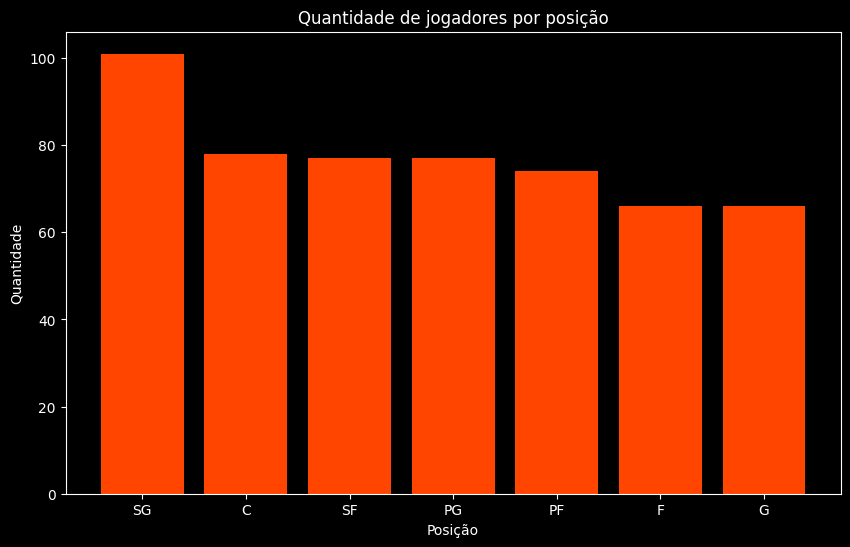

In [43]:
pos_counts = df["POS"].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(pos_counts.index, pos_counts.values, color="orangered")

plt.title("Quantidade de jogadores por posição")
plt.xlabel("Posição")
plt.ylabel("Quantidade")

plt.show()

## Média de pontos por posição

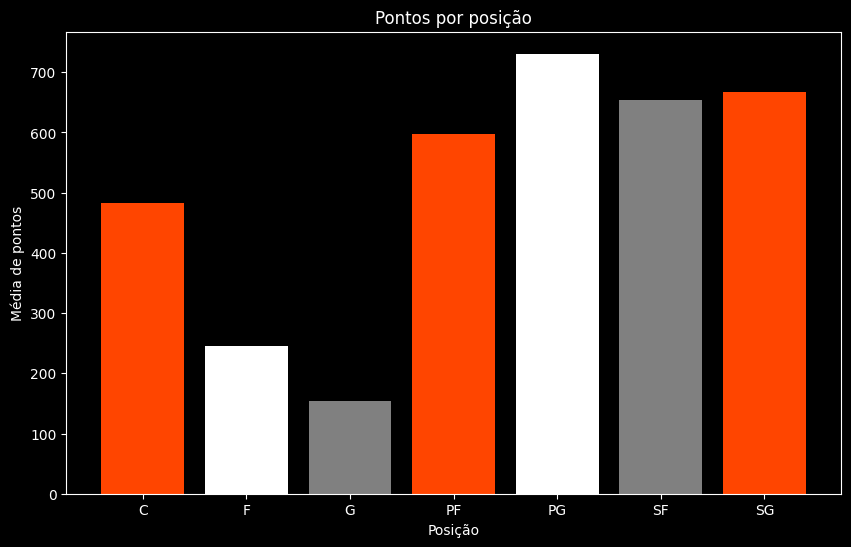

In [44]:
position_stats = df.groupby(["POS"]).agg({"PTS": "mean"}).reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(
    position_stats["POS"],
    position_stats["PTS"],
    color=[
        "orangered",
        "white",
        "grey",
        "orangered",
        "white",
        "grey",
        "orangered",
    ],
)

plt.title("Pontos por posição")
plt.xlabel("Posição")
plt.ylabel("Média de pontos")

plt.show()

## Idade dos Jogadores

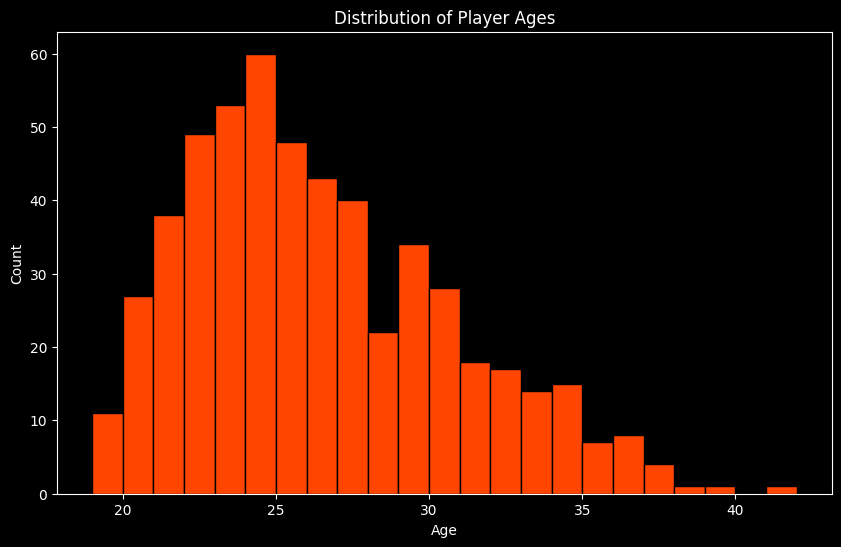

In [45]:
ages = df["Age"]

plt.figure(figsize=(10, 6))
plt.hist(
    ages,
    bins=range(int(ages.min()), int(ages.max()) + 1),
    color="orangered",
    edgecolor="black",
)

plt.title("Distribuição de idade dos jogadores")
plt.xlabel("Idade")
plt.ylabel("Quantidade")

plt.style.use("dark_background")

plt.show()

### Idade e performance

- Considera-se que o jogador entra em seu auge físico e técnico na NBA a partir dos 27.
  - Se adapta ao estilo de jogo mais físico da liga.

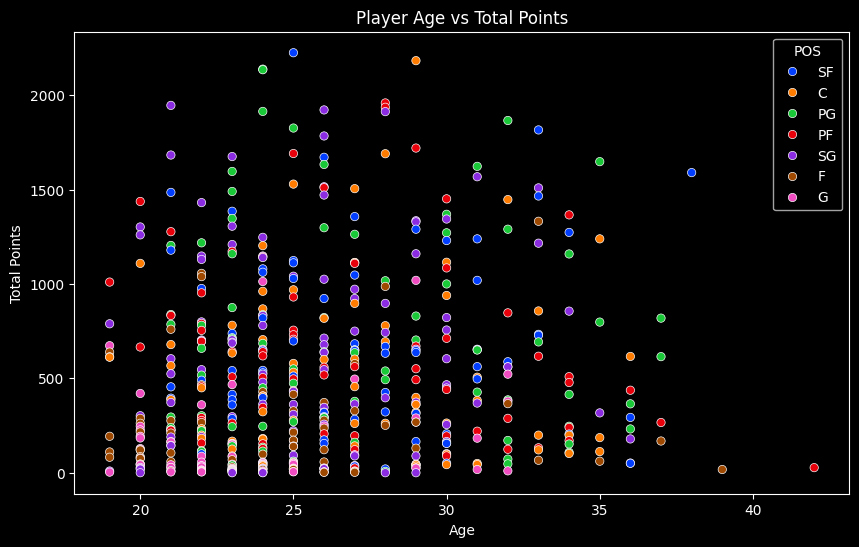

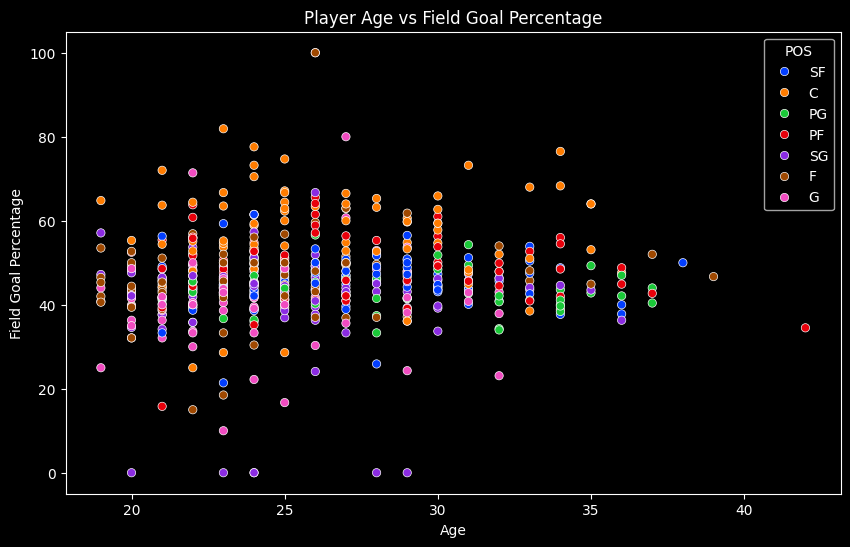

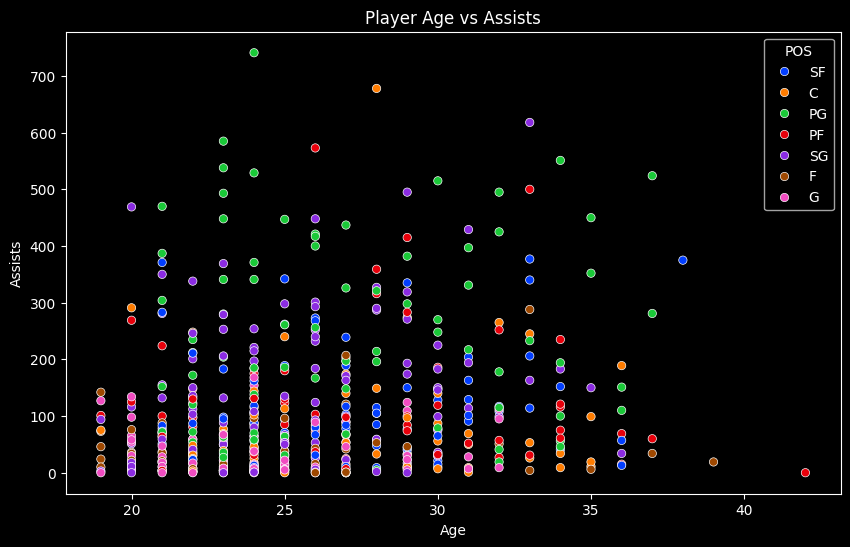

In [46]:
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="PTS", hue="POS", palette="bright")
plt.title("Idade do jogador vs Total de pontos")
plt.xlabel("Idade")
plt.ylabel("Total de pontos")
plt.legend(title="POS")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="FG%", hue="POS", palette="bright")
plt.title("Idade do jogador vs Field Goal Percentage")
plt.xlabel("Idade")
plt.ylabel("Field Goal Percentage")
plt.legend(title="POS")
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Age", y="AST", hue="POS", palette="bright")
plt.title("Idade do jogador vs Assistências")
plt.xlabel("Idade")
plt.ylabel("Assitências")
plt.legend(title="POS")
plt.show()

## Quantidade de duplos-duplos e triplos-duplos

DD = Dois dígitos em duas das principais estatísticas
DD = Três dígitos em duas das principais estatísticas

DDs normalmente são dominados por pivôs, graças ao grande número de rebotes pegos por jogo.

Houve um grande aumento na quantidade de TDs nos últimos anos, graças a chegada de jogadores com cada vez menos lacunas em seus jogos na liga.

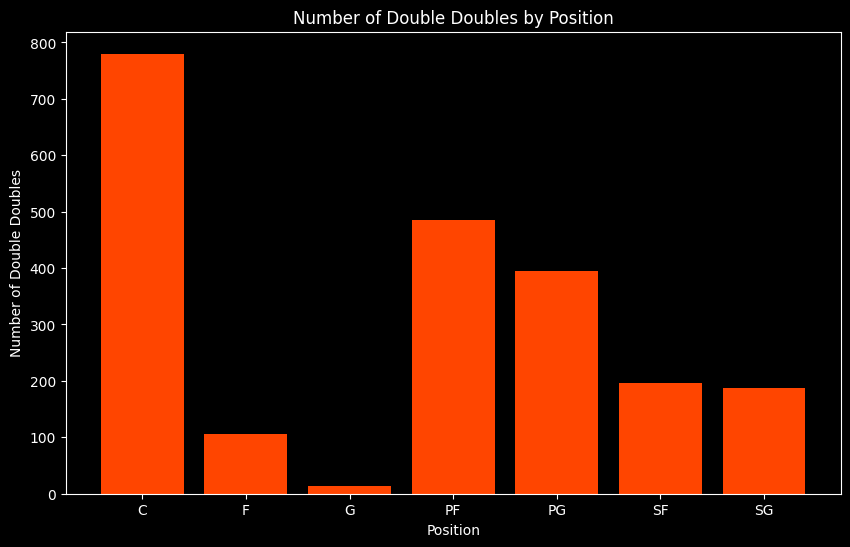

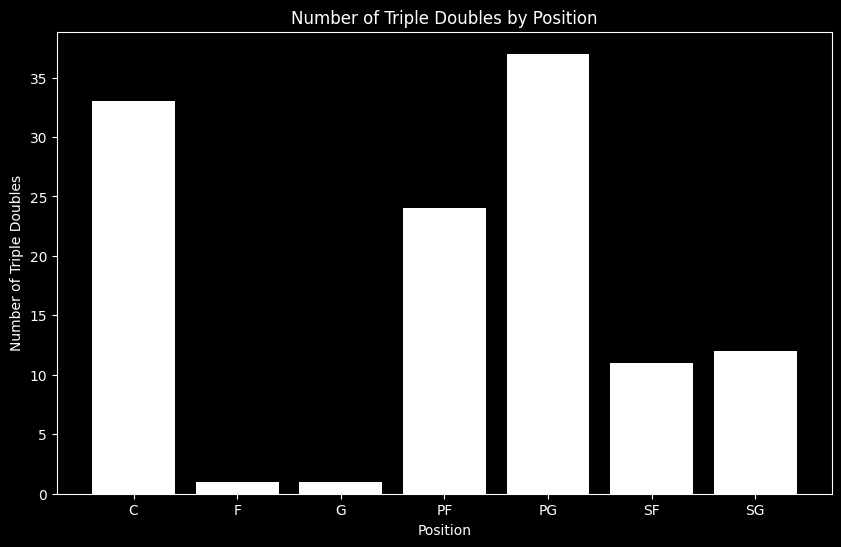

In [47]:
double_doubles_by_position = (
    df.groupby("POS")["DD2"].sum().reset_index()
)
triple_doubles_by_position = (
    df.groupby("POS")["TD3"].sum().reset_index()
)

plt.figure(figsize=(10, 6))
plt.bar(
    double_doubles_by_position["POS"],
    double_doubles_by_position["DD2"],
    color="orangered",
)
plt.title("Número de Duplos-Duplos por posição")
plt.xlabel("Posição")
plt.ylabel("Número de DD")
plt.style.use("dark_background")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(
    triple_doubles_by_position["POS"],
    triple_doubles_by_position["TD3"],
    color="white",
)
plt.title("Número de Triplos-Duplos por posição")
plt.xlabel("Posição")
plt.ylabel("Número de TD")
plt.style.use("dark_background")
plt.show()

## Relação entre pontos e minutos jogados

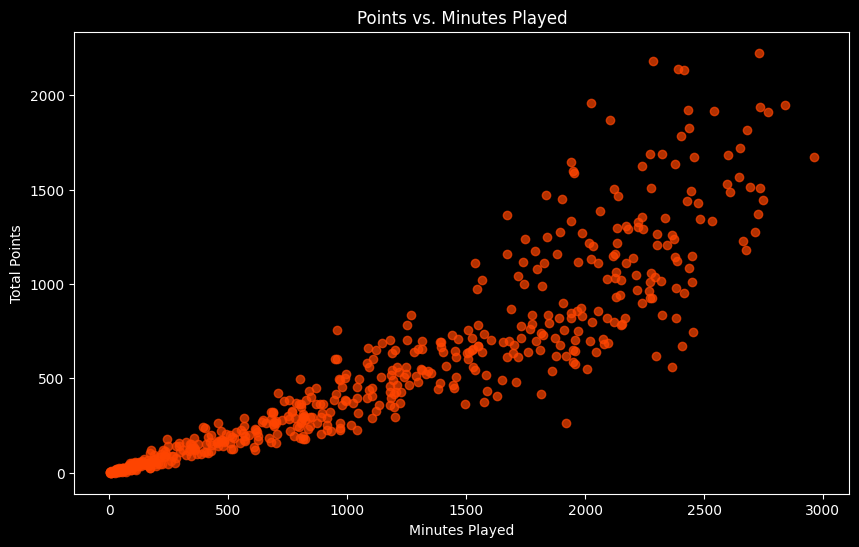

In [48]:
minutes_played = df["Min"]
total_points = df["PTS"]

plt.figure(figsize=(10, 6))
plt.scatter(minutes_played, total_points, color="orangered", alpha=0.7)

plt.title("Pontos vs. Minutos Jogados")
plt.xlabel("Minutos Jogados")
plt.ylabel("Pontos")

plt.style.use("dark_background")

plt.show()

## Perfomance de jogadores Overall

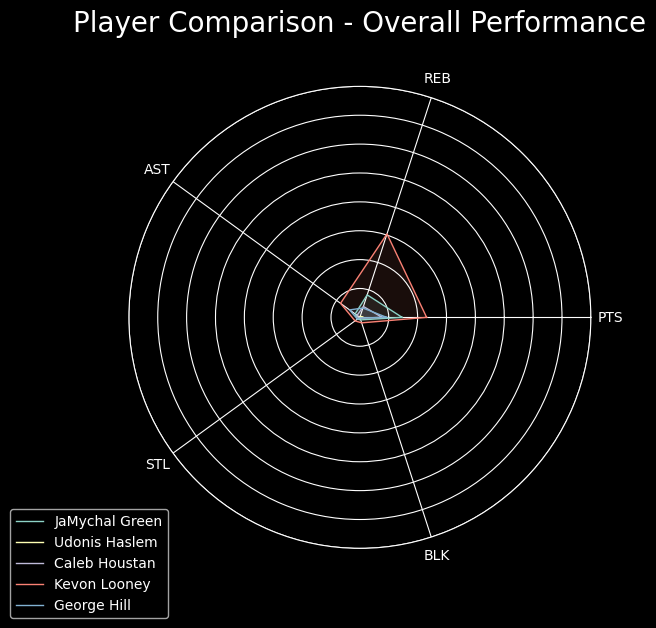

In [49]:
from math import pi

radar_columns = ["PTS", "REB", "AST", "STL", "BLK"]

selected_players = df.sample(n=5)

num_vars = len(radar_columns)


angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1] 

plt.figure(figsize=(10, 6))
ax = plt.subplot(111, polar=True)

for index, player in selected_players.iterrows():
    values = [player[column] for column in radar_columns]
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle="solid", label=player["PName"])
    ax.fill(angles, values, alpha=0.1)

plt.title("Comparação entre jogadores - Overall", size=20, color="white", y=1.1)
ax.set_yticklabels([]) 
ax.set_xticks(angles[:-1])
ax.set_xticklabels(radar_columns, color="white")

ax.set_ylim(0, 2000)

plt.style.use("dark_background")

plt.legend(loc="upper right", bbox_to_anchor=(0.1, 0.1))

plt.show()

## Quantidade de jogadores em cada time

O número máximo de jogadores em cada elenco na NBA é 15, entretanto, na liga ocorre um grande número de trocas de jogadores entre times, rescisões de contrato e contratação de jogadores sem contrato durante o andamento da temporada.

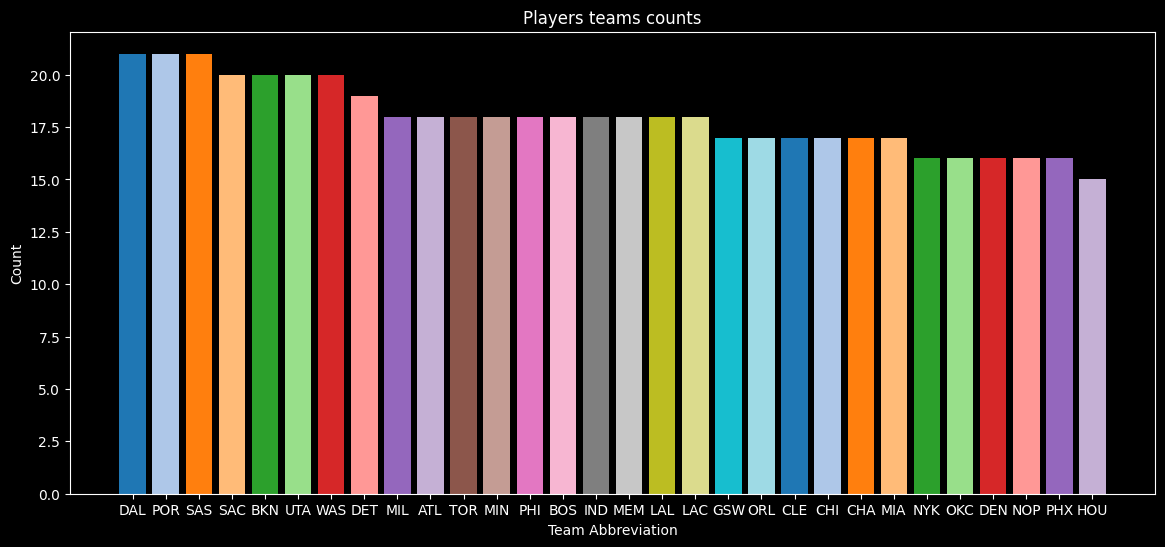

In [50]:
team_counts = df["Team"].value_counts()

plt.figure(figsize=(14, 6))
plt.bar(team_counts.index, team_counts.values, color=plt.cm.tab20.colors)

plt.title("Jogadores em cada time")
plt.xlabel("Time")
plt.ylabel("Quantidade")


plt.style.use("dark_background")

plt.show()

## Vitórias e derrotas de cada time

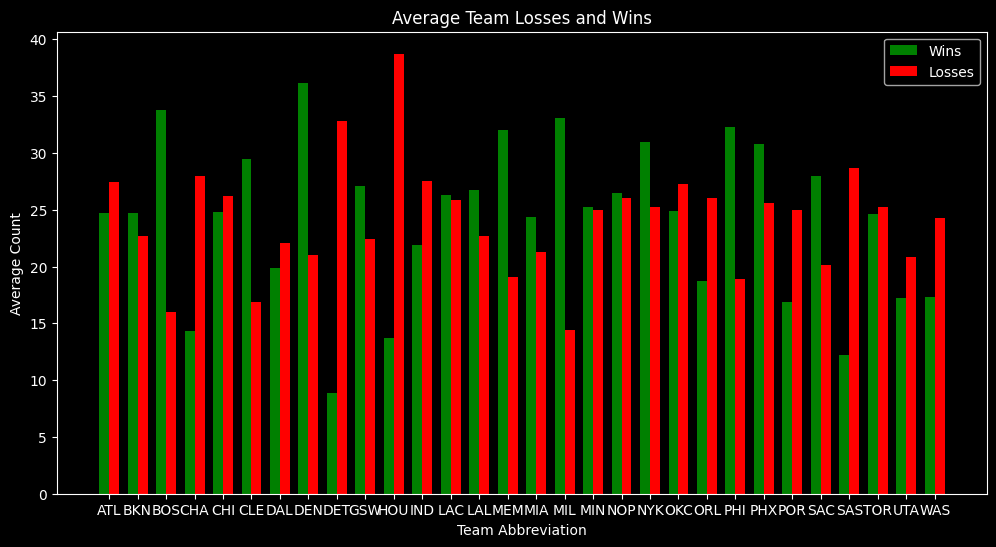

In [51]:
team_stats = (
    df.groupby(["Team"])
    .agg({"W": "mean", "L": "mean"})
    .reset_index()
)

bar_width = 0.35
index = np.arange(len(team_stats))

plt.figure(figsize=(12, 6))
plt.bar(index, team_stats["W"], bar_width, label="Wins", color="green")
plt.bar(index + bar_width, team_stats["L"], bar_width, label="Losses", color="red")

plt.title("Vitórias e Derrotas dos Times")
plt.xlabel("Time")
plt.ylabel("Quantidade Média")
plt.xticks(index + bar_width / 2, team_stats["Team"])

plt.legend()

plt.show()

## Estatísticas dos times

Como ficou a média das estatísticas dos jogadores em cada time.

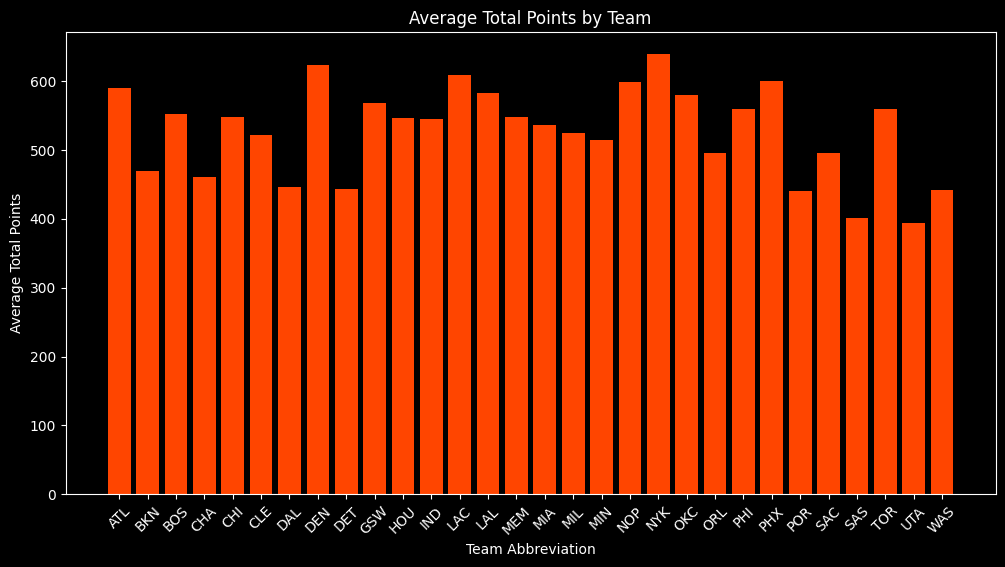

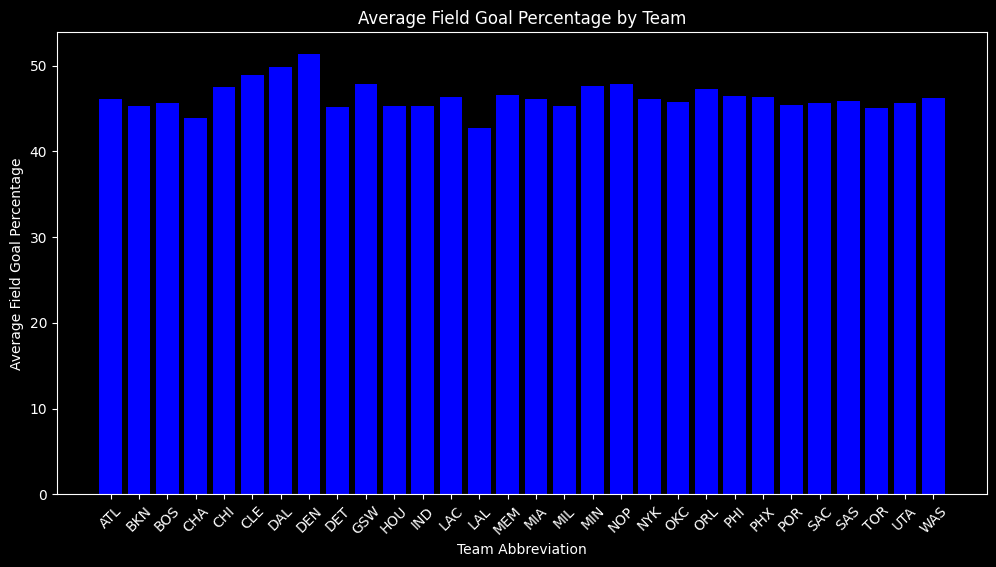

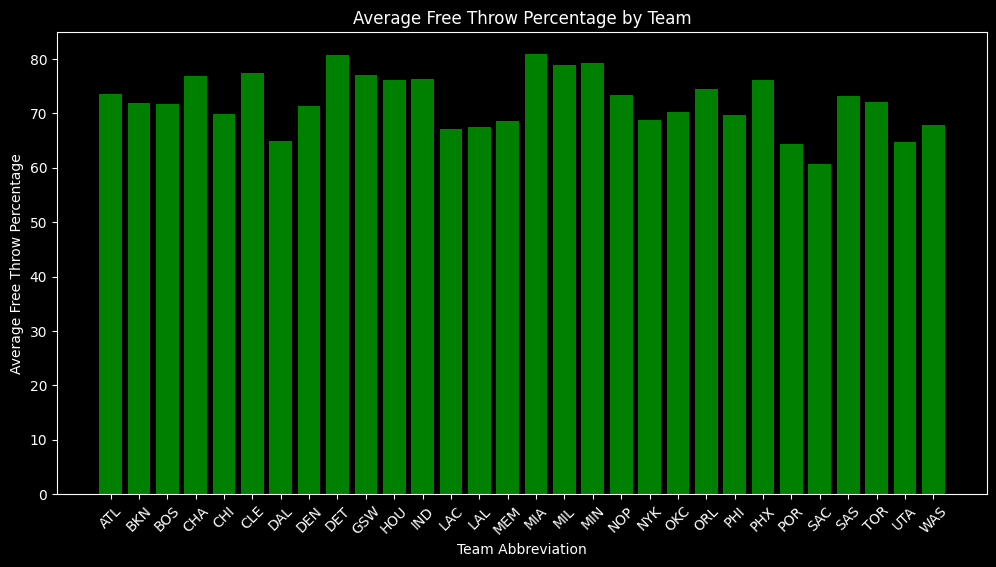

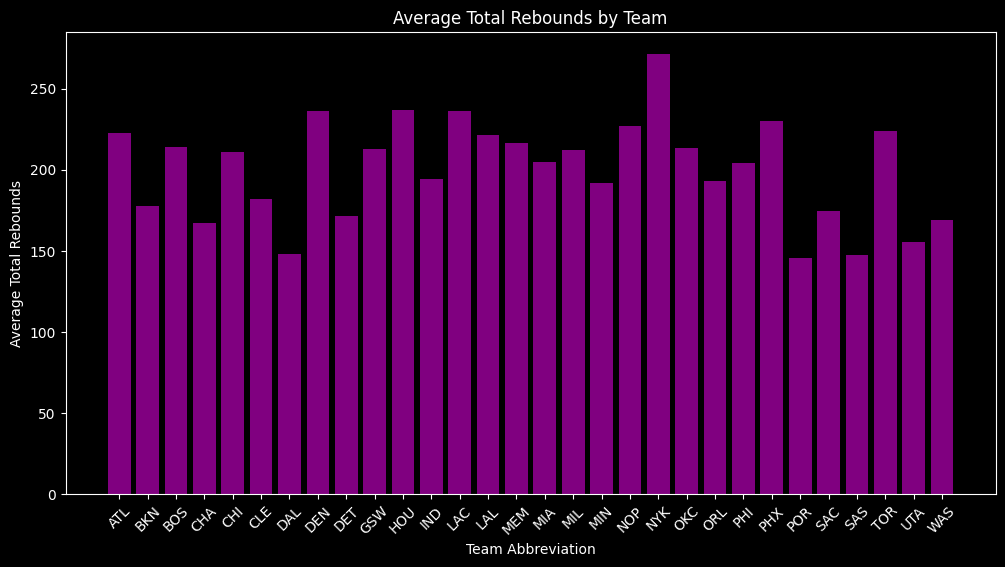

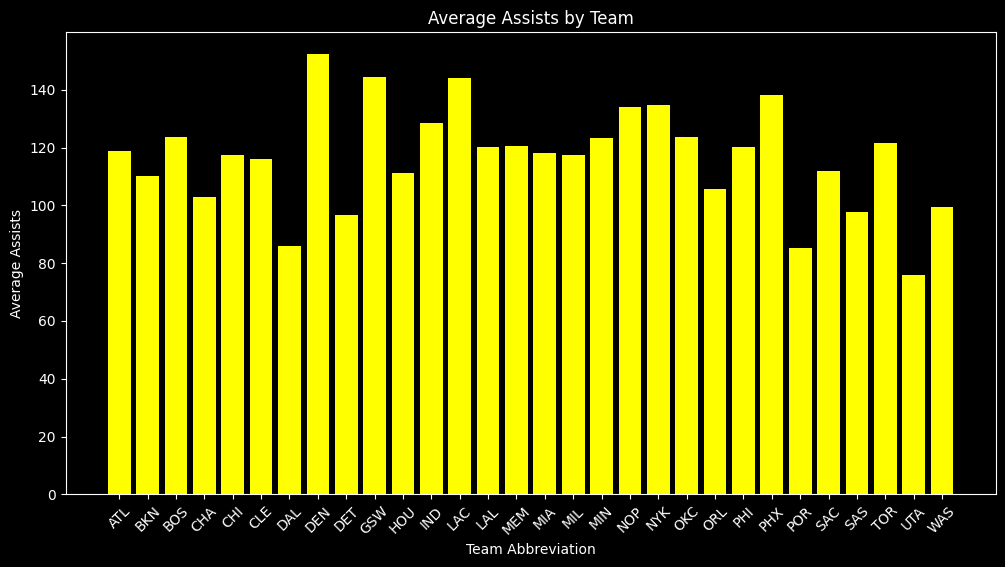

In [52]:
team_stats = (
    df.groupby("Team")
    .agg(
        {
            "PTS": "mean",
            "REB": "mean",
            "AST": "mean",
            "STL": "mean",
            "BLK": "mean",
            "FG%": "mean",
            "FT%": "mean",
        }
    )
    .reset_index()
)


def create_bar_chart(x, y, title, xlabel, ylabel, color):
    plt.figure(figsize=(12, 6))
    plt.bar(x, y, color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.style.use("dark_background")
    plt.show()


create_bar_chart(
    team_stats["Team"],
    team_stats["PTS"],
    "Média de pontos do time",
    "Time",
    "Média de pontos",
    "orangered",
)


create_bar_chart(
    team_stats["Team"],
    team_stats["FG%"],
    "Média Field Goal Percentage do time",
    "Time",
    "Média de Field Goal Percentage",
    "blue",
)


create_bar_chart(
    team_stats["Team"],
    team_stats["FT%"],
    "Média de Free Throw Percentage do time",
    "Time",
    "Média de Free Throw Percentage",
    "green",
)


create_bar_chart(
    team_stats["Team"],
    team_stats["REB"],
    "Média de rebotes do time",
    "Time",
    "Média de rebotes",
    "purple",
)


create_bar_chart(
    team_stats["Team"],
    team_stats["AST"],
    "Média de assistências do time",
    "Time",
    "Média de assistências",
    "yellow",
)

## Melhores jogadores ofensivos

Apresenta os jogadores com maior pontuação presentes no dataset.

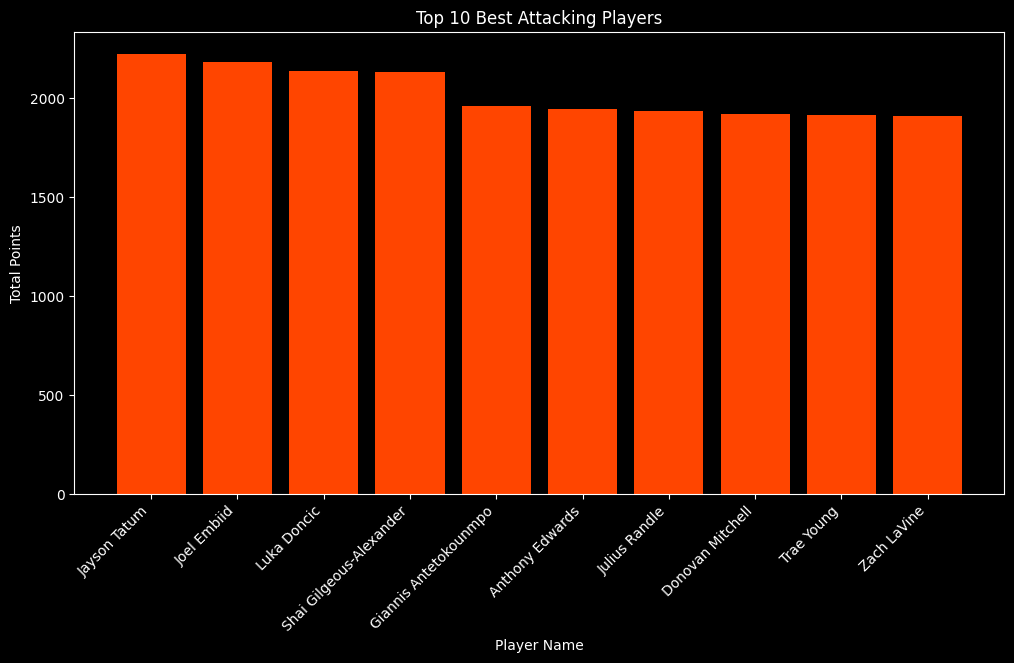

In [53]:
best_attacking_players = df.sort_values(by="PTS", ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(
    best_attacking_players["PName"],
    best_attacking_players["PTS"],
    color="orangered",
)

plt.title("Top 10 Melhores jogadores ofensivos")
plt.xlabel("Nome do Jogador")
plt.ylabel("Pontos Totais")

plt.xticks(rotation=45, ha="right")

plt.style.use("dark_background")

plt.show()

## Remoção de outliers

Se removeu outliers que podem prejudicar a performance do modelo.
Pelo filtro, espera-se remover jogadores com pouca minutagem, que apresentam porcentagems de acertos e erros muito discrepantes do normal. 

In [54]:
outliers_condition = (
    (df["FG%"] > 90)
    | (df["FG%"] == 0)
    | (df["3P%"] > 90)
    | (df["3P%"] == 0)
    | (df["FT%"] == 0)
)

df = df[~outliers_condition]

## Remoção de Colunas

In [55]:
column_to_exclude = ["PName", "POS", "Team","OREB", "DREB", "TD3", "DD2","FP", "FG%", "FT%", "3P%", "FTA", "FGM", "FGA"]


df.drop(columns=column_to_exclude, inplace=True)

## Correlação entre estatísticas

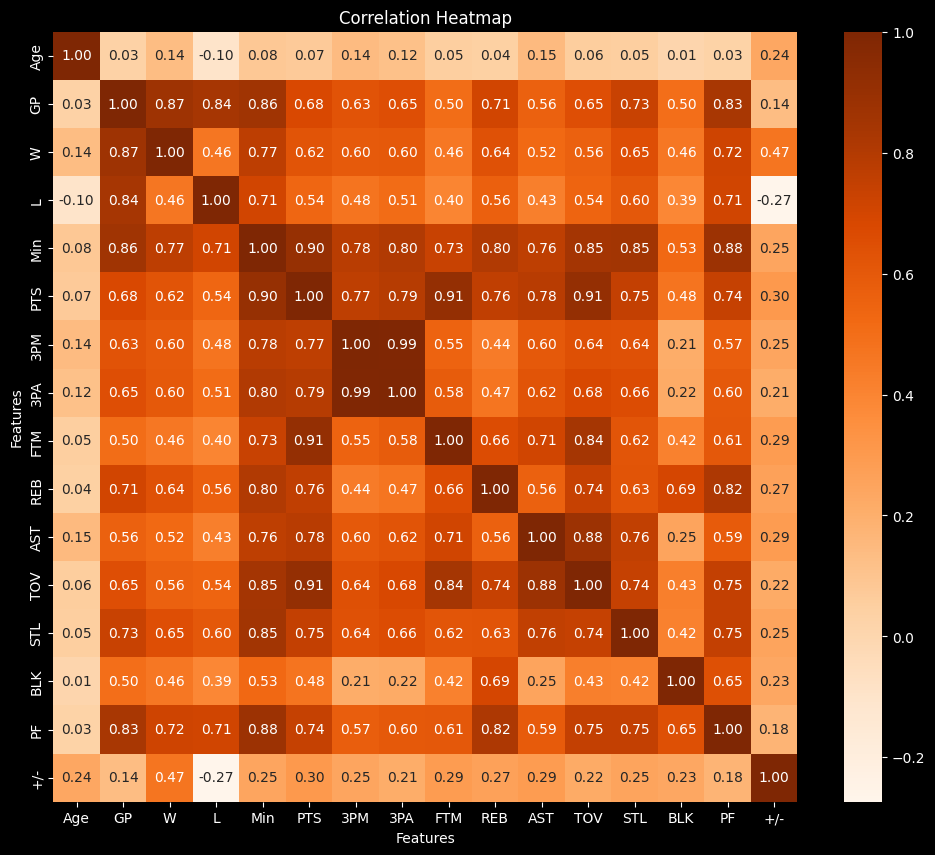

In [56]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="Oranges", fmt=".2f")

plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")

plt.style.use("dark_background")

plt.show()

## Train Test Split

In [57]:
X = df.drop("PTS", axis=1)
y = df["PTS"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=69
)

## Treinamento do Modelo de Regressão Linear

In [58]:
LRmodel = LinearRegression(fit_intercept=True)
LRmodel.fit(X_train, y_train)

y_pred = LRmodel.predict(X_test)

scores = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"]
result = cross_validate(LRmodel, X_test, y_test, cv=10, scoring=scores)
pd.DataFrame(result).mean()

fit_time                              0.004202
score_time                            0.003824
test_neg_mean_absolute_error        -76.245749
test_neg_root_mean_squared_error   -104.308674
test_r2                               0.959252
dtype: float64

### Gráficos da Regressão Linear

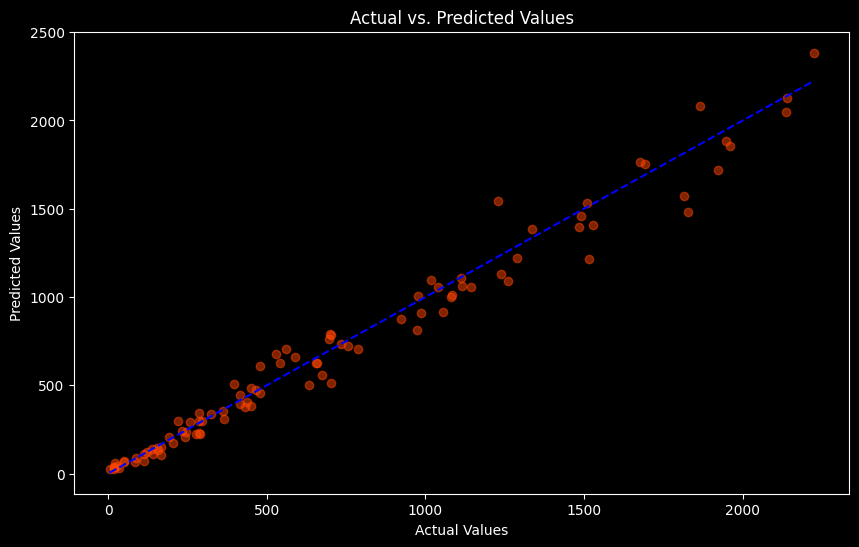

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="orangered", alpha=0.5)
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="--"
)
plt.title("Valores Reais vs. Valores Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.style.use("dark_background")
plt.show()

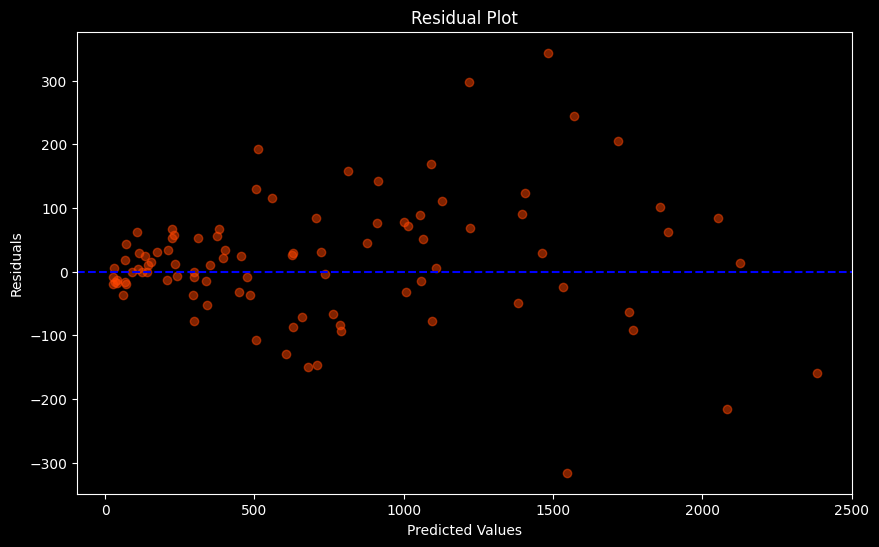

In [60]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="orangered", alpha=0.5)
plt.axhline(y=0, color="blue", linestyle="--")
plt.title("Gráfico de Resíduos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduo")
plt.style.use("dark_background")
plt.show()

## Treinamento do Modelo KNN

In [61]:
Kmodel = KNeighborsRegressor()
Kmodel.fit(X_train, y_train)

y_pred = Kmodel.predict(X_test)

scores = ["neg_mean_absolute_error", "neg_root_mean_squared_error", "r2"]
result = cross_validate(Kmodel, X_test, y_test, cv=10, scoring=scores)
pd.DataFrame(result).mean()

fit_time                              0.003207
score_time                            0.003549
test_neg_mean_absolute_error       -134.949333
test_neg_root_mean_squared_error   -196.104898
test_r2                               0.844045
dtype: float64

### Gráficos do KNN

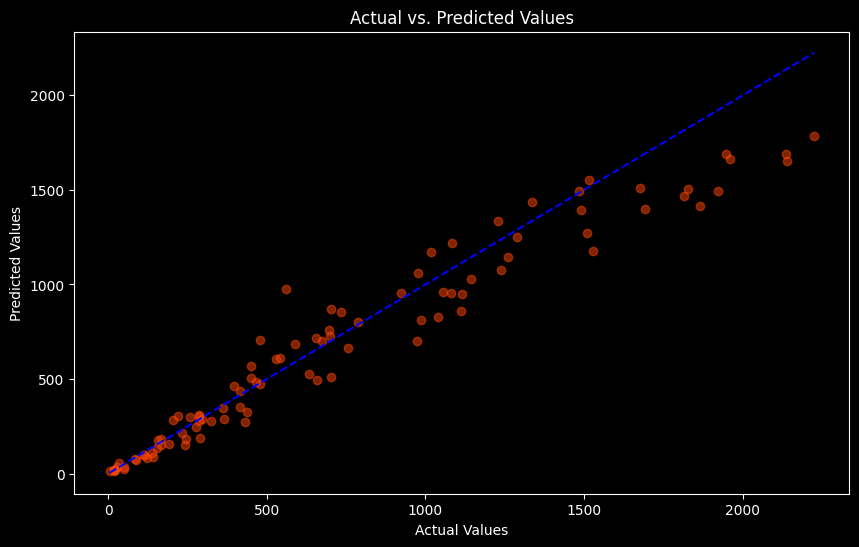

In [62]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color="orangered", alpha=0.5)
plt.plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)], color="blue", linestyle="--"
)
plt.title("Valores Reais vs. Valores Preditos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.style.use("dark_background")
plt.show()

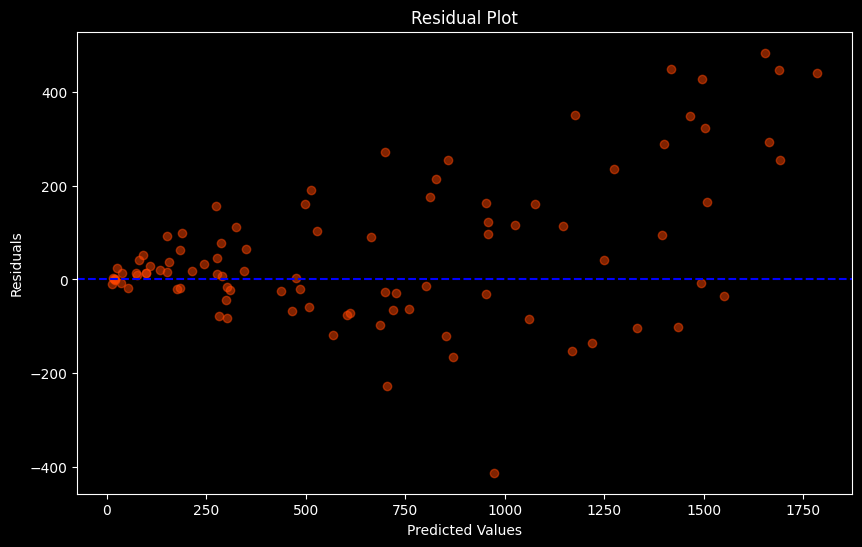

In [63]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color="orangered", alpha=0.5)
plt.axhline(y=0, color="blue", linestyle="--")
plt.title("Gráfico de Resíduos")
plt.xlabel("Valores Preditos")
plt.ylabel("Resíduo")
plt.style.use("dark_background")
plt.show()

## Conclusão

Acerca do trabalho desenvolvido